#### Importing Libraries:

In [7]:
import pandas as pd
import glob
import os

#### Task 1: Import multiple csv file and add them:

In [11]:
path = r'C:/Users/Tushar/anaconda3/new_data/Sales_Data'
all_files = glob.glob(os.path.join(path, "*.csv"))

all_files

['C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_April_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_August_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_December_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_February_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_January_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_July_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_June_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_March_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_May_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_November_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_October_2019.csv',
 'C:/Users/Tushar/anaconda3/new_data/Sales_Data\\Sales_September_2019.csv']

In [12]:
merged_data = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0)
    merged_data.append(df)
    

frame = pd.concat(merged_data, axis=0, ignore_index=True)

frame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [14]:
# the above code can be simplified as

path = r'C:/Users/Tushar/anaconda3/new_data/Sales_Data'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(filename) for filename in all_files)
all_data = pd.concat(df_from_each_file, ignore_index=True)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Clean the data:

In [16]:
# selecting the rows with non-values(NaN)

nan_rows = all_data[all_data.isna().any(axis=1)]
nan_rows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# removing the rows with non-values(NaN)

all_data = all_data.dropna(how='all')
# 'how' has 2 arguments
# 'all'--> to drop rows with all NaN values
#  or 'any' --> to drop rows with any NaN values

In [24]:
# Removing the 'Or' error
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to correct data type:

In [28]:
# convert to integer type()
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Order ID'] = pd.to_numeric(all_data['Order ID'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 2: Augment data with additional columns

##### Adding months column

In [25]:
# Easiest way is to add the first 2 charecters in the Order Date
# as a separate column

all_data['Month'] = all_data['Order Date'].str[0:2]

# Convert the month column to integer type
# An error will happen here because the 1st row is copied for all files too
# 'Or' as an error

all_data['Month'] = all_data['Month'].astype('int32')
# We do the above because we need to differentiate wrt different months

##### Adding a total sales column:

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question 1: What was the best month for sales? How much was earned that month?

In [31]:
results = all_data.groupby('Month').sum()

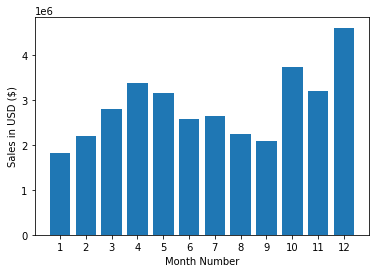

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.bar(months, results['Sales'])
plt.xticks(all_data['Month'].unique())
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')

plt.show()

#### Question 2: What city had the highest number of sales?

##### Augment data with city column:

In [54]:
# Use of .apply()
# Since the city name is between commas

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]  
          # because of the space before city

all_data['City'] = all_data['Purchase Address'].apply(
    lambda x: get_city(x) + ' ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [60]:
results1 = all_data.groupby('City').sum()
results1


,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta GA,3423838407,16602,2.779908e+06,104794,2.795499e+06
Austin TX,2280982185,11153,1.809874e+06,69829,1.819582e+06
Boston MA,4598265261,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,3415643578,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,6811084693,33289,5.421435e+06,208325,5.452571e+06
New York City NY,5736333884,27932,4.635371e+06,175741,4.664317e+06
Portland ME,563266345,2750,4.471893e+05,17144,4.497583e+05
Portland OR,2305594747,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,10304443952,50239,8.211462e+06,315520,8.262204e+06


<ipython-input-70-346523ca7bec>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(cities)
<ipython-input-70-346523ca7bec>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(results1['Sales'], rotation='vertical')


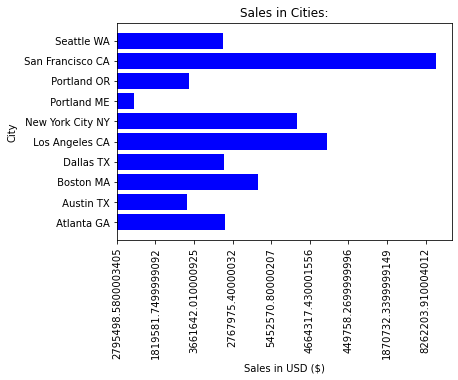

In [70]:
fig, ax = plt.subplots()

cities = [city for city, df in all_data.groupby('City')]
# since unique() arranges the value different to groupby()
# the graph becomes inconsistence.

ax.barh(cities, results1['Sales'] , color='b')
       
ax.set_yticklabels(cities)
ax.set_xticklabels(results1['Sales'], rotation='vertical')
ax.set_ylabel('City')
ax.set_xlabel('Sales in USD ($)')
ax.set_title('Sales in Cities:')

plt.show()

#### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [74]:
# Since the 'Order Date' may be in different formats
# Use datetime object

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [78]:
# to extract Hourly data, add another column
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


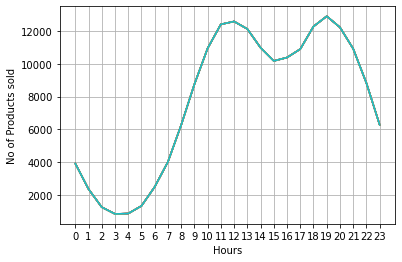

In [83]:
hour = [hours for hours, df in all_data.groupby('Hour')]

plt.plot(hour, all_data.groupby('Hour').count())
plt.xticks(hour)
plt.ylabel('No of Products sold')
plt.xlabel('Hours')

plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

##### They have the same ID and the address:

In [92]:
# for the same ID:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Add different products
df['Combined'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicates
df = df[['Order ID', 'Combined']].drop_duplicates()
df.head()

<ipython-input-92-bbcb03d19be3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Combined'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Combined
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


##### Counting Pairs:

In [95]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Combined']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why?

In [108]:
total = all_data.groupby('Product').sum()['Quantity Ordered']

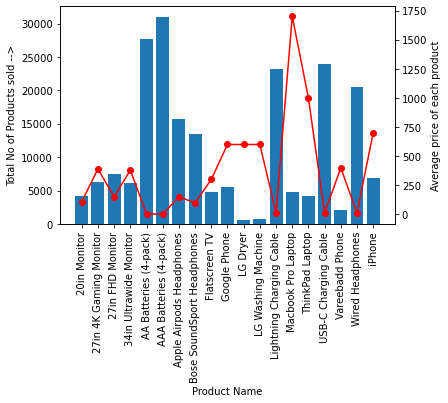

In [120]:
product = [prods for prods, df in all_data.groupby('Product')]
mean_price = all_data.groupby('Product').mean()['Price Each']

plt.bar(product, total)
plt.xticks(rotation='vertical')
plt.xlabel('Product Name')
plt.ylabel('Total No of Products sold -->')
# to Overlay a 2nd grapg with shared x axis:
plt.twinx()
plt.plot(mean_price, 'o-',color='r')
plt.ylabel('Average price of each product')


plt.show()